Dominos Delivery Time Analysis

Problem Understanding:     
I had given a dataset containing delivery time details of a Dominos store.   
Dominos evaluates store performance based on the 95th percentile of delivery time, which must be less than 31 minutes.  
    
Objective:   
Analyze delivery time data    
Check whether the store meets Dominos SLA    
Identify reasons for delays   
Suggest improvements to help the store retain its franchise    

Step 1: Import Libraries & Load Data    
Start by importing the required Python libraries and loading the dataset.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


Step 2: Understanding the Dataset

Before analysis, check the structure of the dataset to understand:    
Number of rows and columns    
Column names     
Data types    
Basic statistics   

In [2]:
df.shape

df.info()

df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

Step 3: Data Cleaning

Convert Timestamp Columns to Datetime  

Calculated it using the difference between delivery time and order placed time.

Checking for missing values and remove invalid delivery times (like zero or negative values), as they can affect the percentile calculation.

In [3]:
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])

df["delivery_time"] = (df["order_delivered_at"] - df["order_placed_at"]).dt.total_seconds() / 60
df.head()

df = df[df["delivery_time"] > 0]

Step 4: Calculating 95th Percentile (Core Metric)

Dominos evaluates stores based on the 95th percentile delivery time, so I calculate it using NumPy.  

In [4]:
p95 = np.percentile(df["delivery_time"], 95)
p95

if p95 < 31:
    print("Store meets Dominos SLA")
else:
    print("Store violates Dominos SLA")

Store meets Dominos SLA


Step 5: Delivery Time Distribution

Visualize the distribution of delivery times using a histogram to understand skewness and delays.

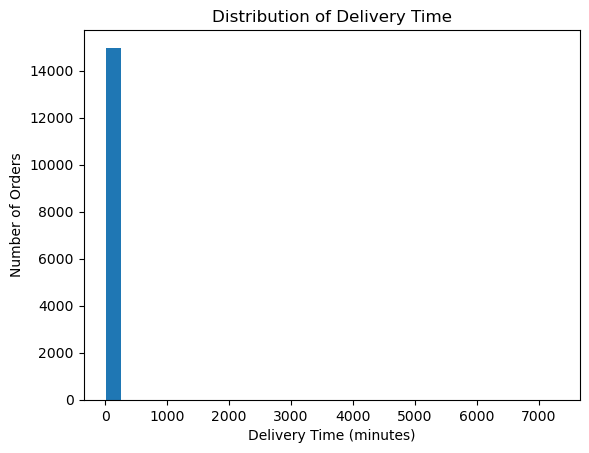

In [5]:
plt.figure()
plt.hist(df["delivery_time"], bins=30)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.title("Distribution of Delivery Time")
plt.show()

Step 6: Outlier Analysis

I used a boxplot to identify extreme delivery delays that affect SLA performance.

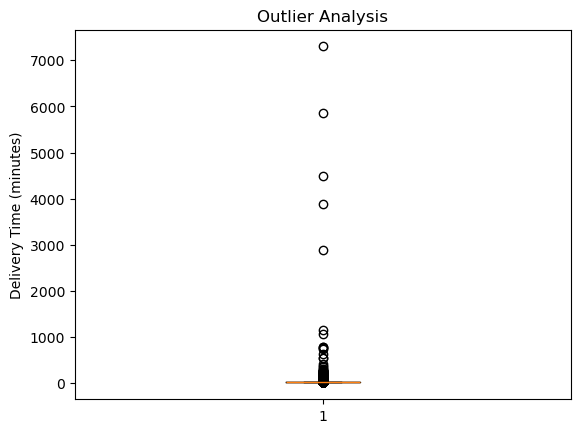

In [6]:
plt.figure()
plt.boxplot(df["delivery_time"])
plt.ylabel("Delivery Time (minutes)")
plt.title("Outlier Analysis")
plt.show()

Step 7: Peak Hour Analysis (If Order Time Exists)

Analyzed that whether delivery time increases during specific hours of the day.

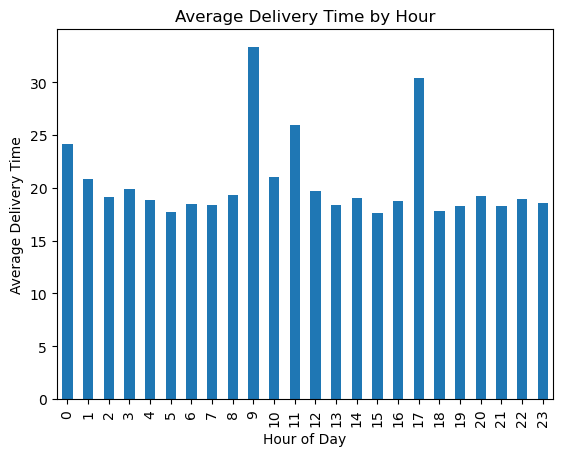

In [8]:
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["order_hour"] = df["order_placed_at"].dt.hour

hourly_avg = df.groupby("order_hour")["delivery_time"].mean()

plt.figure()
hourly_avg.plot(kind="bar")
plt.xlabel("Hour of Day")
plt.ylabel("Average Delivery Time")
plt.title("Average Delivery Time by Hour")
plt.show()